# Dataset Forest Fires

**Información del conjunto de datos**

Número de instancias 517 ; Número de atributos 12

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: 'jan' to 'dec'
   4. day - day of the week: 'mon' to 'sun'
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20 ( Índice de Humedad del Combustible Fino)
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 ( Índice de Humedad del Combustible Medio)
   7. DC - DC index from the FWI system: 7.9 to 860.6 (Índice de Sequedad del Combustible)
   8. ISI - ISI index from the FWI system: 0.0 to 56.10 (Índice de Propagación Inicial)
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100 (Humedad relativa)
   11. wind - wind speed in km/h: 0.40 to 9.40
   12. rain - outside rain in mm/m2 : 0.0 to 6.4
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform).

[Artículo](https://doi.org/10.24432/C5D88D)




### Importamos Librerias necesarias y Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
# Para importar el dataset y que sea fácil de correr sin necesidad de subir archivos, le he creado un repositorio en GITHUB al proyecto
# Importamos el git del proyecto
!git clone https://github.com/DonLuisM/Mini_Proyecto_RN.git   # Se clona el repositorio de git

Cloning into 'Mini_Proyecto_RN'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 8.85 KiB | 8.85 MiB/s, done.


In [4]:
ruta_dataset = '/content/Mini_Proyecto_RN/forestfires.csv'  # Copiamos la ruta del dataset
data = pd.read_csv(ruta_dataset, delimiter=',')   # Le hacemos un pandas read para el dataset el cuál está separado por comas (delimiter)
print(data) # Imprimimos el dataset

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]


In [5]:
data.head(10) # Visualizamos las 10 primeras filas

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
data.tail(10) # Visualizamos las últimas 10 filas. Cuenta con 517 instancias.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [7]:
data.info() # Con esta línea de código nos permite tener información acerca del typo de datos de cada característica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
nulos = data.isnull().sum() # Encontramos si en el dataset hay valores nulos, verificación
print(f"La cantidad de datos nulos es de:\n\n{nulos}")  # Imprimimos

La cantidad de datos nulos es de:

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

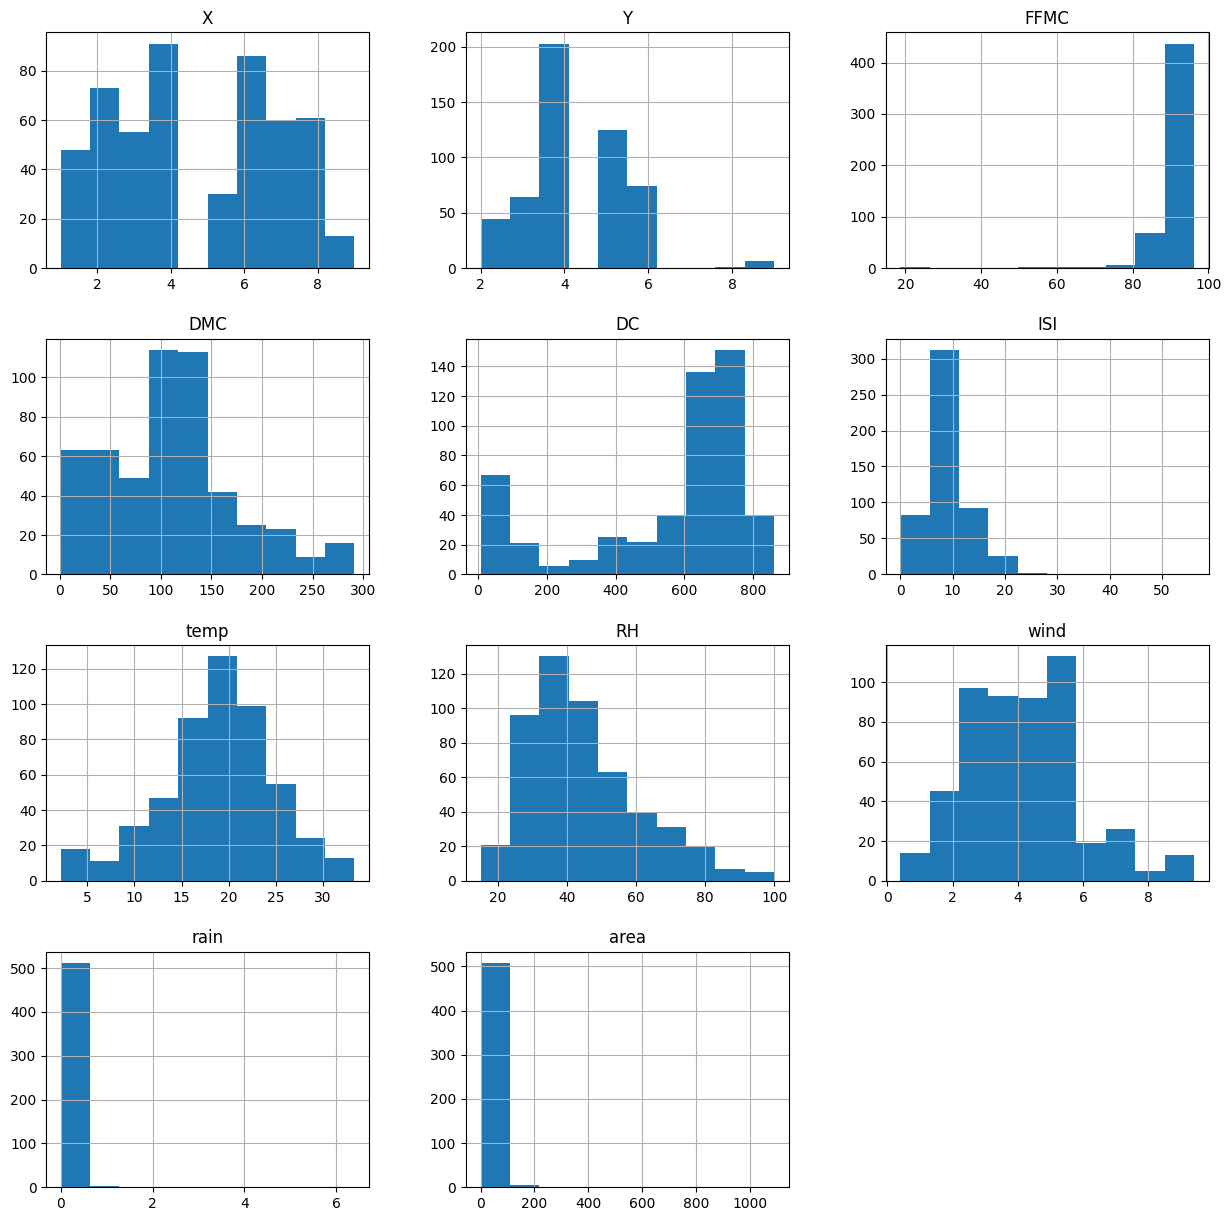

In [9]:
data.hist(figsize=(15,15))

### Copia del dataset original para realizar manipulación

In [10]:
data_copy = data.copy() # Copiamos el dataset para modificarlo

In [11]:
# Datos tipo --> object
data_copy['month'].value_counts() # Se puede contar cuantos valores se tiene de cada mes

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [12]:
data_copy['day'].value_counts() # Se puede contar cuantos valores se tiene en los días

sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

In [13]:
# Reemplazamos el tipo, asignandole valores númericos a los meses (1-12) y días (1-7)
data_copy['month']=data_copy['month'].replace({"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12})
data_copy['day']=data_copy['day'].replace({"mon":1, "tue":2, "wed":3, "thu":4, "fri":5, "sat":6, "sun":7})

In [14]:
data_copy  # Visualizar datos

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [15]:
data_copy.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


### Normalización y Visualización de datos

In [16]:
def normalizar(x, xmax, xmin, ymax, ymin):  # El ymax y ymin son los valores que quiero que queden normalizados (ymax = 1) (ymin = 0)
  m = (ymax-ymin)/(xmax-xmin) # Pendiente
  b = ymin - m*xmin # Tengo elección, si escojo el ymax debo elegir xmax

  y = m*x + b

  return y

In [17]:
max = np.max(data_copy).values
min = np.min(data_copy).values
print(data_copy.columns)
print(min)
print(max)

df = normalizar(data_copy, max, min, 1, 0)
df.head()

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')
[ 1.   2.   1.   1.  18.7  1.1  7.9  0.   2.2 15.   0.4  0.   0. ]
[   9.      9.     12.      7.     96.2   291.3   860.6    56.1    33.3
  100.      9.4     6.4  1090.84]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0.750,0.428571,0.181818,0.666667,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.750,0.285714,0.818182,0.166667,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.750,0.285714,0.818182,0.833333,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.875,0.571429,0.181818,0.666667,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.875,0.571429,0.181818,1.000000,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'FFMC'}>,
        <Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>,
        <Axes: title={'center': 'rain'}>],
       [<Axes: title={'center': 'area'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

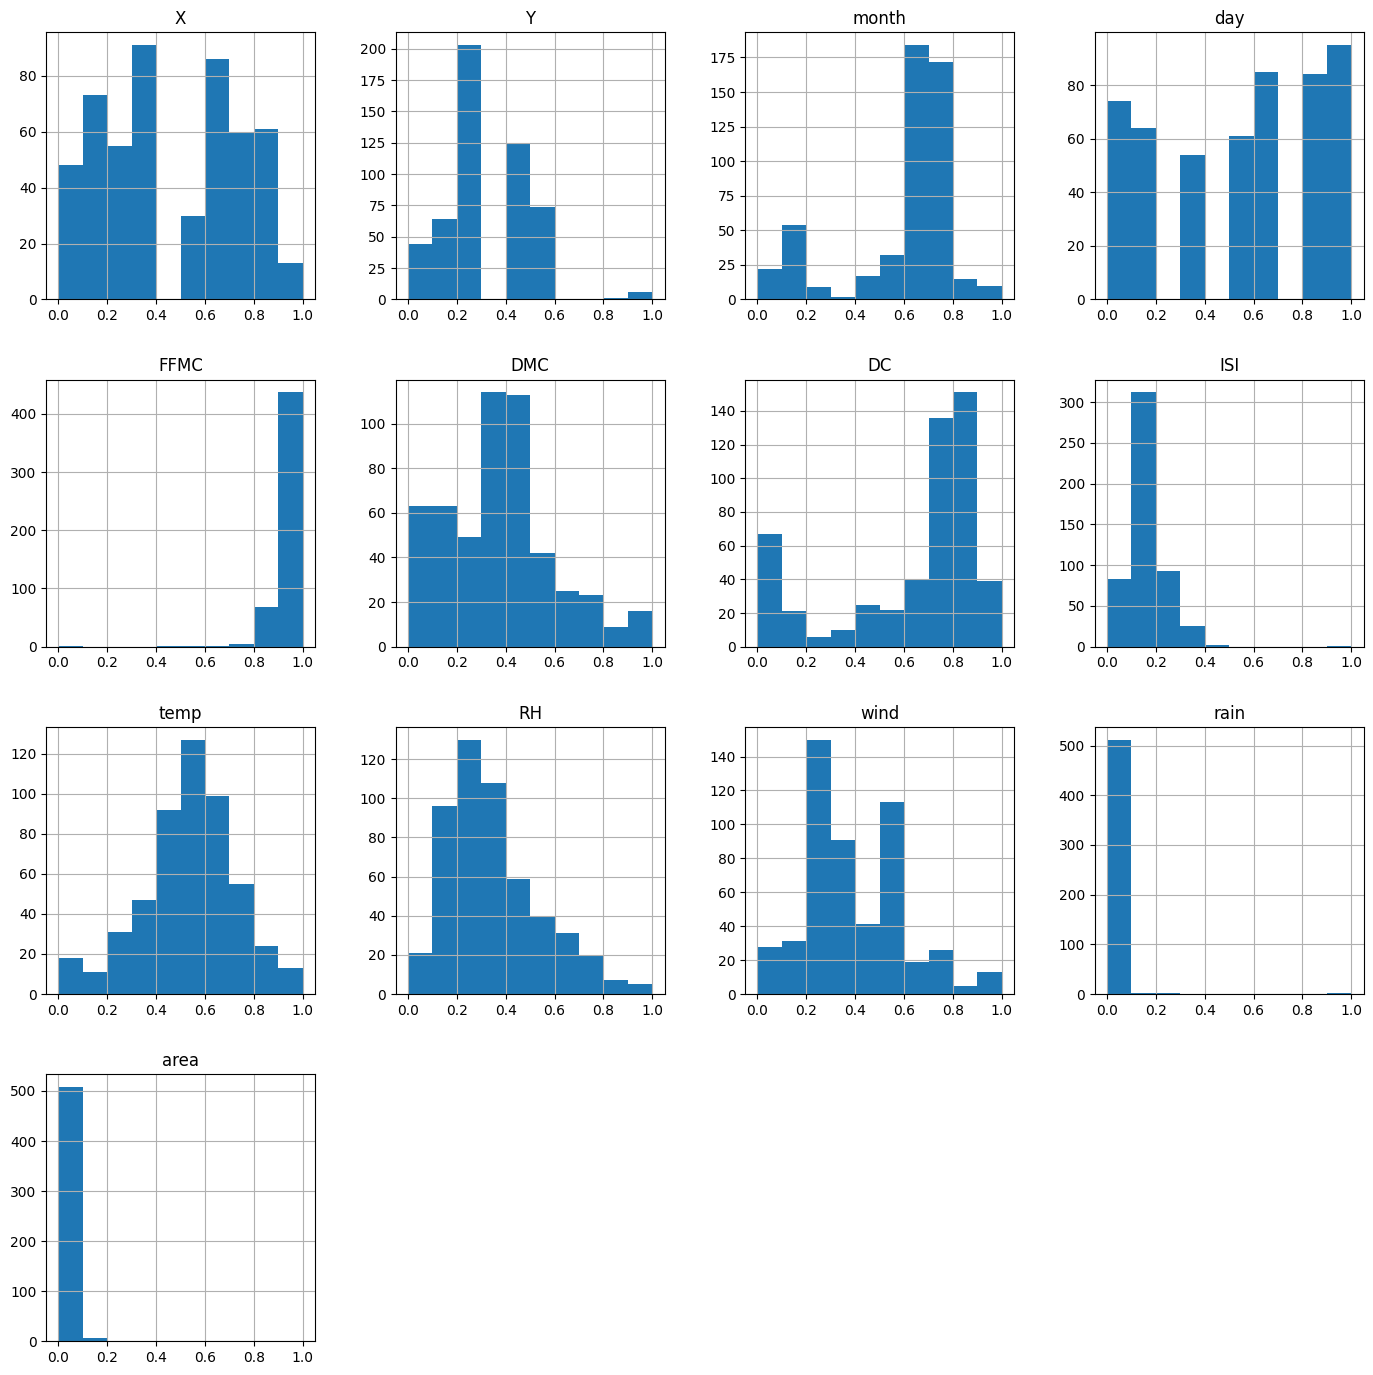

In [ ]:
# Histograma
df.hist(figsize=(17,17))

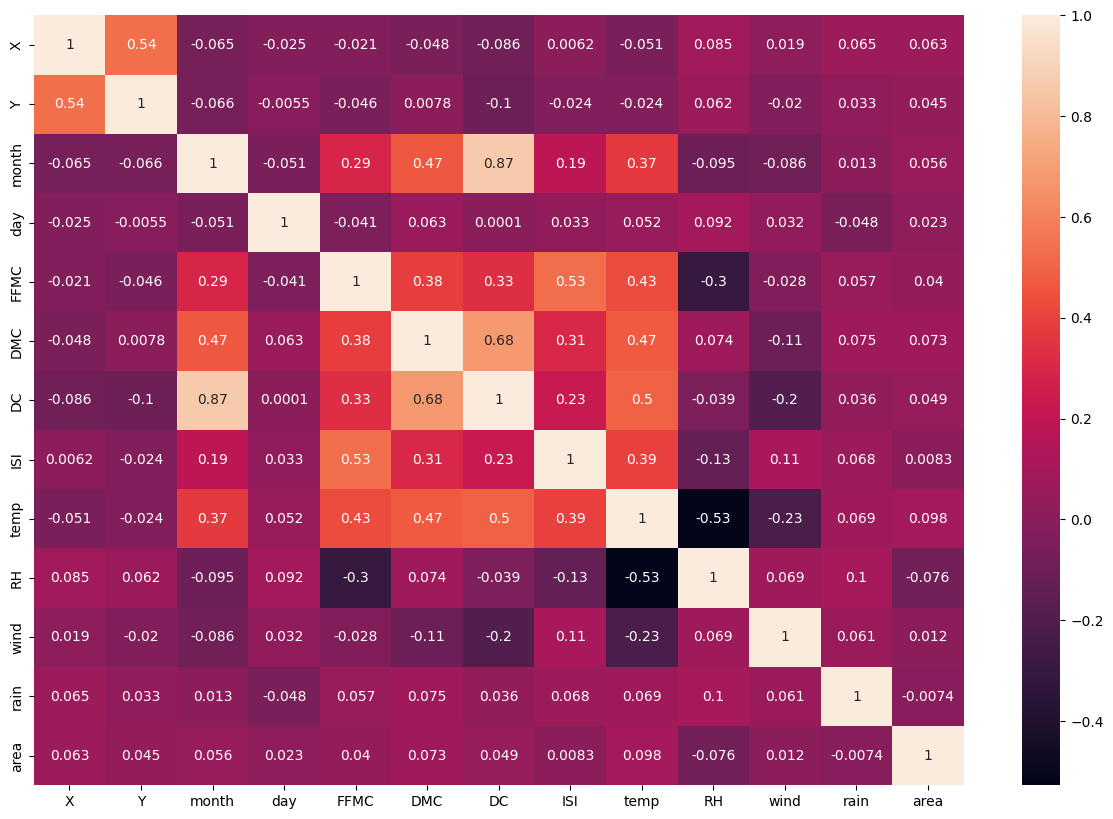

In [ ]:
# Matriz de correlación
correlation_dc = df.corr()
plt.figure(figsize=(15,10))
sn.heatmap(correlation_dc, annot=True)
plt.savefig("matriz_correlacion_Forest.jpg")

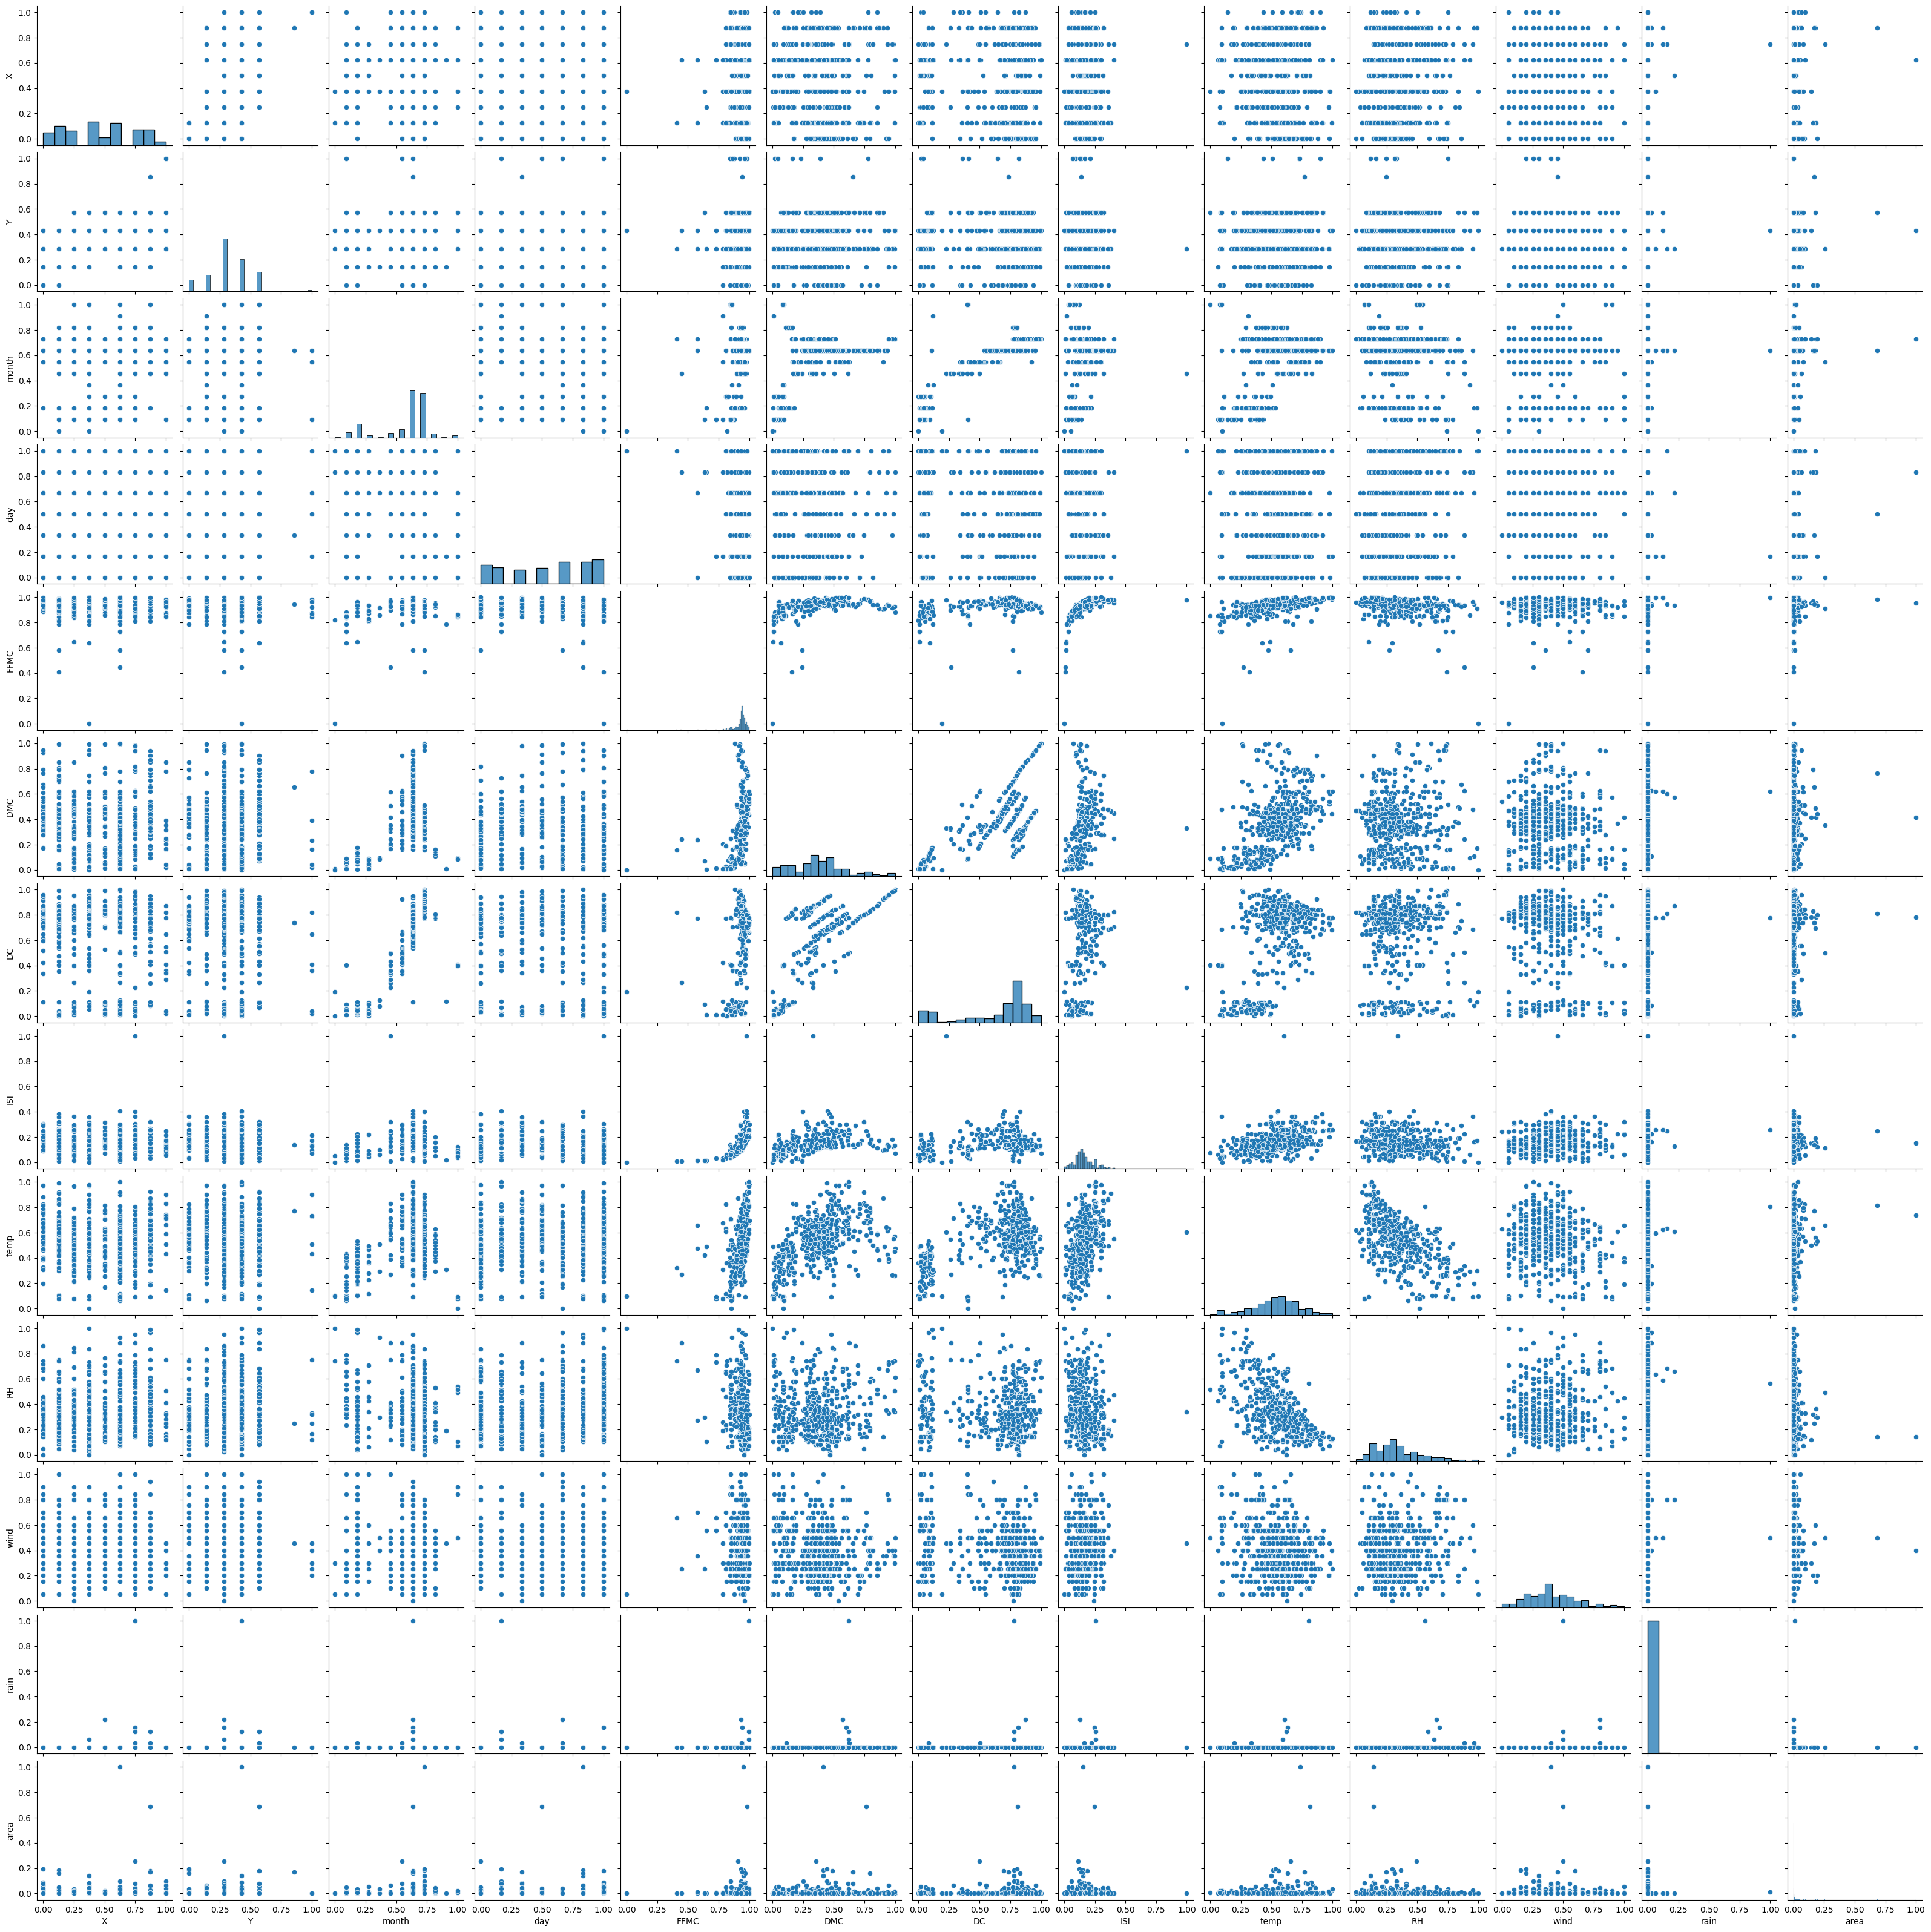

In [ ]:
#
sn.pairplot(df)

### *Creación de modelo neuronal. (NO)*

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
# DATOS DE ENTRENAMIENTO Y TESTEO
objetivo = df['area'].values
caracteristicas = df.drop(['area'], axis=1)

print(objetivo.shape)
print(caracteristicas.shape)

(517,)
(517, 12)


In [ ]:
from sklearn.model_selection import train_test_split
seeds = 42

x_train,x_test,y_train,y_test = train_test_split(caracteristicas, objetivo, test_size=0.3, random_state=seeds)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(361, 12)
(361,)
(156, 12)
(156,)


In [ ]:
input_dim = x_train.shape[1]
num_clases = 1
lr = 0.001
EPOCHS = 1000
loss = 'mse'

12


In [ ]:
def model1():
  model = Sequential()
  model.add(Dense(4, input_dim = input_dim, activation='tanh'))
  model.add(Dense(4, activation='tanh'))
  model.add(Dense(num_clases, activation='linear'))

  model.summary()

  opt = tf.keras.optimizers.SGD(learning_rate=lr)

  model.compile(loss = loss, optimizer = opt)

  return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 52        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 77 (308.00 Byte)
Trainable params: 77 (308.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


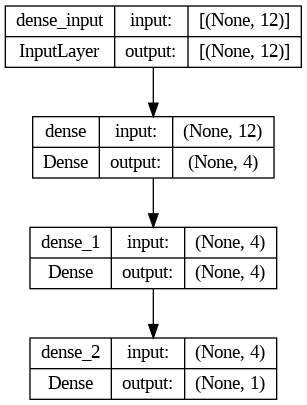

In [ ]:
model = model1()
plot_model(model, show_shapes=True)

In [ ]:
loss = []
loss_val = []
epochs = 1

In [ ]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=0)

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

loss.append(history.history['loss'][0])
loss_val.append(history.history['val_loss'][0])

print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])

epochs += 1

while loss_val[len(loss_val)-1] > 0.0053: #  Se compara el varlo de la última posición de loss_val
  history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=1, batch_size=32, verbose=0)
  loss.append(history.history['loss'][0])
  loss_val.append(history.history['val_loss'][0])
  print('Epoch: ',epochs,'loss:',loss[epochs-1], 'val_loss:',loss_val[epochs-1])
  epochs += 1

Epoch:  1 loss: 0.01191625464707613 val_loss: 0.016716869547963142
Epoch:  2 loss: 0.011754250153899193 val_loss: 0.01655794493854046
Epoch:  3 loss: 0.011594847775995731 val_loss: 0.016412943601608276
Epoch:  4 loss: 0.011447347700595856 val_loss: 0.01626756228506565
Epoch:  5 loss: 0.01130053773522377 val_loss: 0.016130663454532623
Epoch:  6 loss: 0.011161806993186474 val_loss: 0.0159946046769619
Epoch:  7 loss: 0.01102383527904749 val_loss: 0.01587749645113945
Epoch:  8 loss: 0.010904560796916485 val_loss: 0.015759648755192757
Epoch:  9 loss: 0.01078537292778492 val_loss: 0.01564675383269787
Epoch:  10 loss: 0.010670030489563942 val_loss: 0.015548129566013813
Epoch:  11 loss: 0.010570084676146507 val_loss: 0.015446589328348637
Epoch:  12 loss: 0.01046665944159031 val_loss: 0.015344624407589436
Epoch:  13 loss: 0.010362115688621998 val_loss: 0.015241795219480991
Epoch:  14 loss: 0.010256917215883732 val_loss: 0.015152943320572376
Epoch:  15 loss: 0.010166296735405922 val_loss: 0.0150

KeyboardInterrupt: 

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(score)

0.006758130621165037


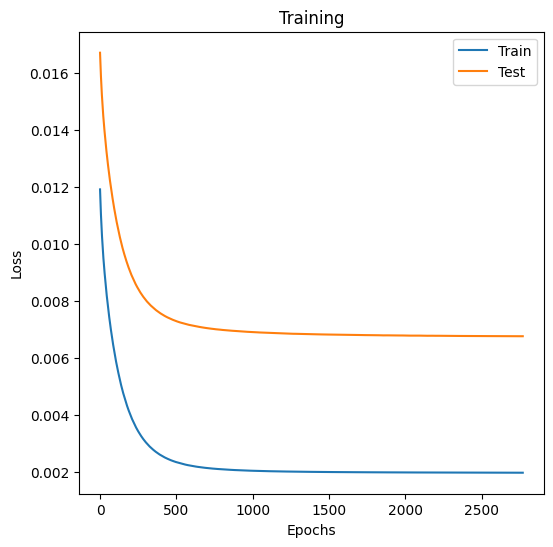

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(loss)
plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Training')
plt.show()

### Creación de modelo neuronal


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [19]:
# DATOS DE ENTRENAMIENTO Y TESTEO
objetivo = df['area'].values
caracteristicas = df.drop(['area'], axis=1)

print(objetivo.shape)
print(caracteristicas.shape)

(517,)
(517, 12)


In [20]:
from sklearn.model_selection import train_test_split
seeds = 42

x_train,x_test,y_train,y_test = train_test_split(caracteristicas, objetivo, test_size=0.3, random_state=seeds)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(361, 12)
(361,)
(156, 12)
(156,)


### Entrenamiento modelo 1

In [71]:
input_dim = x_train.shape[1]
num_clases = 1

modelo = Sequential()
modelo.add(Dense(4,input_dim = input_dim,activation='relu'))
modelo.add(Dense(8,activation='relu'))
modelo.add(Dense(32,activation='relu'))
modelo.add(Dense(64,activation='relu'))
modelo.add(Dense(num_clases,activation='linear'))

modelo.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 4)                 52        
                                                                 
 dense_20 (Dense)            (None, 8)                 40        
                                                                 
 dense_21 (Dense)            (None, 32)                288       
                                                                 
 dense_22 (Dense)            (None, 64)                2112      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2557 (9.99 KB)
Trainable params: 2557 (9.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modelo.compile(loss = 'mse', optimizer = optimizer)

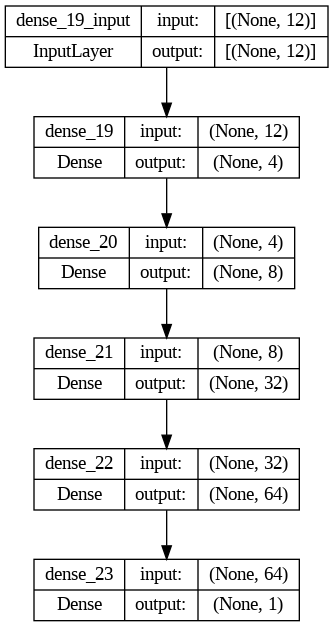

In [73]:
plot_model(modelo, show_shapes=True)

In [84]:
loss = []
loss_val = []

history = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)

loss.append(history.history['loss'][0])
loss_val.append(history.history['val_loss'][0])

epochs = 1

while loss_val[-1] > 0.00665:
    history = modelo.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1, batch_size=32, verbose=0)
    loss.append(history.history['loss'][0])
    loss_val.append(history.history['val_loss'][0])
    epochs += 1
    print('Epoch:', epochs, 'loss:', loss[-1], 'val_loss:', loss_val[-1])


Epoch: 2 loss: 0.0019623341504484415 val_loss: 0.006684408523142338
Epoch: 3 loss: 0.0019623443949967623 val_loss: 0.006684611085802317
Epoch: 4 loss: 0.0019622568506747484 val_loss: 0.006684679072350264
Epoch: 5 loss: 0.00196221680380404 val_loss: 0.006684937514364719
Epoch: 6 loss: 0.001962103648111224 val_loss: 0.0066851056180894375
Epoch: 7 loss: 0.001962195383384824 val_loss: 0.006685252301394939
Epoch: 8 loss: 0.0019621949177235365 val_loss: 0.0066853356547653675
Epoch: 9 loss: 0.0019621269311755896 val_loss: 0.006685510743409395
Epoch: 10 loss: 0.001962122740224004 val_loss: 0.006685513071715832
Epoch: 11 loss: 0.0019622822292149067 val_loss: 0.006685606203973293
Epoch: 12 loss: 0.001962117152288556 val_loss: 0.006685416679829359
Epoch: 13 loss: 0.0019621860701590776 val_loss: 0.0066855596378445625
Epoch: 14 loss: 0.0019622971303761005 val_loss: 0.006685581058263779
Epoch: 15 loss: 0.0019621173851191998 val_loss: 0.006685709115117788
Epoch: 16 loss: 0.0019620568491518497 val_los

KeyboardInterrupt: 

In [85]:
score = modelo.evaluate(x_test, y_test, verbose=0)
print(score)

0.006691711954772472


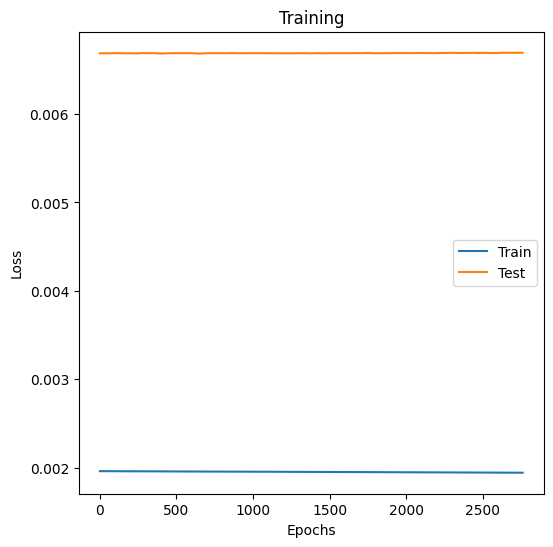

In [86]:
plt.figure(figsize=(6,6))
plt.plot(loss)
m1 = plt.plot(loss_val)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'])
plt.title('Training')
plt.show()

In [87]:
outputTest = modelo.predict(x_test)
print(outputTest.shape)

5/5 [==============================] - 0s 2ms/step
(156, 1)


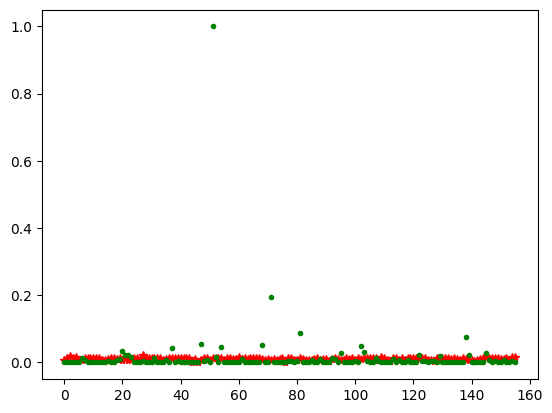

In [88]:
plt.figure()
plt.plot(outputTest, '*r',y_test, '.g')

### Entrenamiento modelo 2

In [21]:
seeds = 42
x_train2,x_test2,y_train2,y_test2 = train_test_split(caracteristicas, objetivo, test_size=0.3, random_state=seeds)

In [22]:
from keras.layers import Dropout
input_dim = x_train.shape[1]
num_clases = 1

modelo2 = Sequential()
modelo2.add(Dense(32,activation='tanh',input_dim= input_dim))
modelo2.add(Dense(64, activation='tanh'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(16, activation='tanh'))
modelo2.add(Dense(32, activation='tanh'))
modelo2.add(Dropout(0.2))
modelo2.add(Dense(8, activation='tanh'))
modelo2.add(Dense(num_clases, activation='linear'))
modelo2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2

In [23]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modelo2.compile(loss = 'mse', optimizer = optimizer, metrics=['mae'])

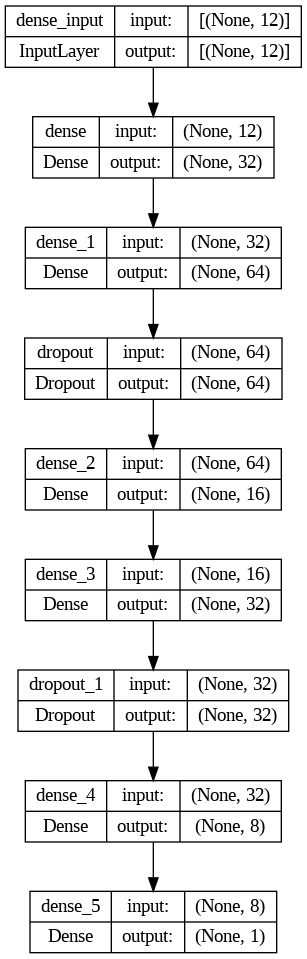

In [24]:
plot_model(modelo2, show_shapes=True)

In [25]:
history2 = modelo2.fit(x_train2, y_train2, epochs=500, batch_size=32, validation_data=(x_test2, y_test2))

Epoch 1/500
12/12 [==============================] - 6s 46ms/step - loss: 0.0627 - mae: 0.2040 - val_loss: 0.0376 - val_mae: 0.1541
Epoch 2/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0601 - mae: 0.1977 - val_loss: 0.0358 - val_mae: 0.1491
Epoch 3/500
12/12 [==============================] - 0s 11ms/step - loss: 0.0671 - mae: 0.2103 - val_loss: 0.0340 - val_mae: 0.1442
Epoch 4/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0631 - mae: 0.1973 - val_loss: 0.0323 - val_mae: 0.1391
Epoch 5/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0569 - mae: 0.1918 - val_loss: 0.0310 - val_mae: 0.1354
Epoch 6/500
12/12 [==============================] - 0s 12ms/step - loss: 0.0647 - mae: 0.2082 - val_loss: 0.0303 - val_mae: 0.1335
Epoch 7/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0626 - mae: 0.2002 - val_loss: 0.0295 - val_mae: 0.1318
Epoch 8/500
12/12 [==============================] - 0s 15ms/step - loss: 0.

In [26]:
score2 = modelo2.evaluate(x_test2, y_test2, verbose=0)
print(score2)

[0.006845811381936073, 0.023515984416007996]


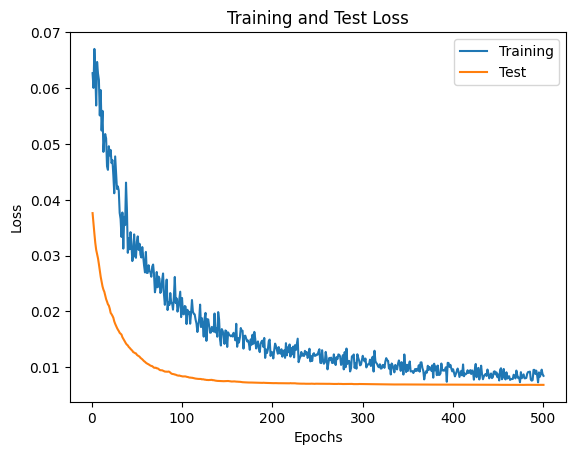

In [27]:
loss_values2 = history2.history['loss'] # Entrenamiento
value_loss2 = history2.history['val_loss']  # Validación
epoch = range(1,len(loss_values2)+1)
m2 = plt.plot(epoch,loss_values2, label = 'Training')
plt.plot(epoch,value_loss2, label = 'Test')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
outputTest2 = modelo2.predict(x_test2)
print(outputTest2.shape)

5/5 [==============================] - 0s 2ms/step
(156, 1)


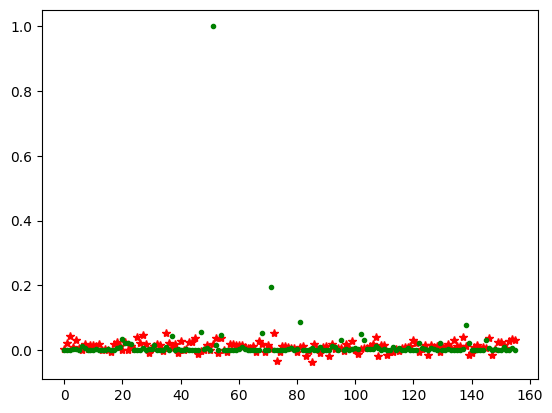

In [29]:
plt.figure()
plt.plot(outputTest2, '*r',y_test2, '.g')

### Entrenamiento modelo 3

In [35]:
seeds = 42
x_train,x_test,y_train,y_test = train_test_split(caracteristicas, objetivo, test_size=0.3, random_state=seeds)

In [36]:
input_dim = x_train.shape[1]
num_clases = 1

modelo3 = Sequential()
modelo3.add(Dense(32,activation='relu',input_dim= input_dim))
modelo3.add(Dense(32, activation='relu'))
modelo3.add(Dense(32, activation='relu'))
modelo3.add(Dense(num_clases, activation='linear'))
modelo3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                416       
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2561 (10.00 KB)
Trainable params: 2561 (10.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modelo3.compile(loss = 'mse', optimizer = optimizer, metrics=['mse'])

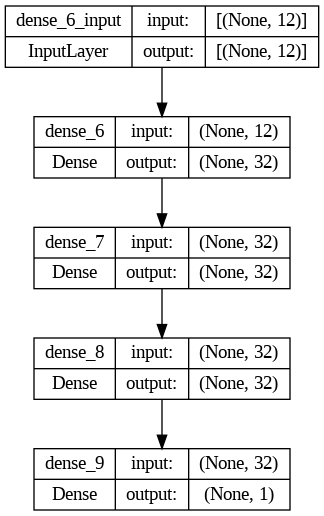

In [38]:
plot_model(modelo3, show_shapes=True)

In [39]:
history3 = modelo3.fit(x_train, y_train, epochs=2000, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/2000
12/12 [==============================] - 1s 18ms/step - loss: 0.0666 - mse: 0.0666 - val_loss: 0.0687 - val_mse: 0.0687
Epoch 2/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0509 - mse: 0.0509 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 3/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0394 - mse: 0.0394 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 4/2000
12/12 [==============================] - 0s 7ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0370 - val_mse: 0.0370
Epoch 5/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0247 - mse: 0.0247 - val_loss: 0.0312 - val_mse: 0.0312
Epoch 6/2000
12/12 [==============================] - 0s 6ms/step - loss: 0.0200 - mse: 0.0200 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 7/2000
12/12 [==============================] - 0s 7ms/step - loss: 0.0165 - mse: 0.0165 - val_loss: 0.0235 - val_mse: 0.0235
Epoch 8/2000
12/12 [==============================] - 0s 7ms/step - loss: 0

In [40]:
score3 = modelo3.evaluate(x_test, y_test, verbose=0)
print(score3)

[0.007363492157310247, 0.007363492157310247]


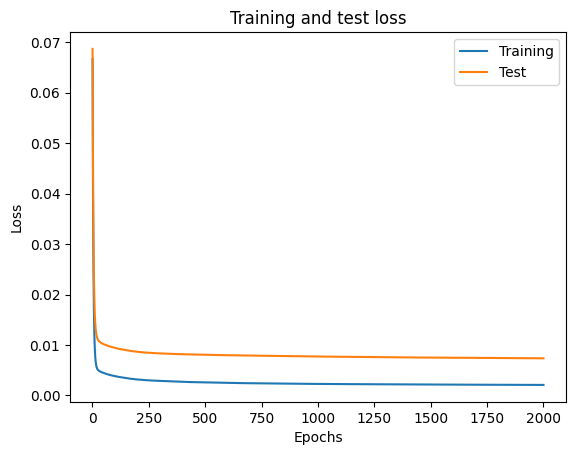

In [41]:
loss_values3 = history3.history['loss']
value_loss3 = history3.history['val_loss']
epoch = range(1,len(loss_values3)+1)
m3 = plt.plot(epoch,loss_values3, label = 'Training')
plt.plot(epoch,value_loss3, label = 'Test')
plt.title("Training and test loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
outputTest3 = modelo3.predict(x_test)
print(outputTest3.shape)

5/5 [==============================] - 0s 2ms/step
(156, 1)


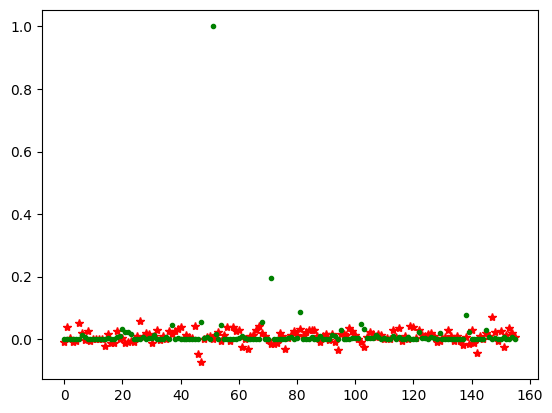

In [43]:
plt.figure()
plt.plot(outputTest3, '*r',y_test, '.g')

5/5 [==============================] - 0s 2ms/step
(156, 1)


(0.0, 0.1)

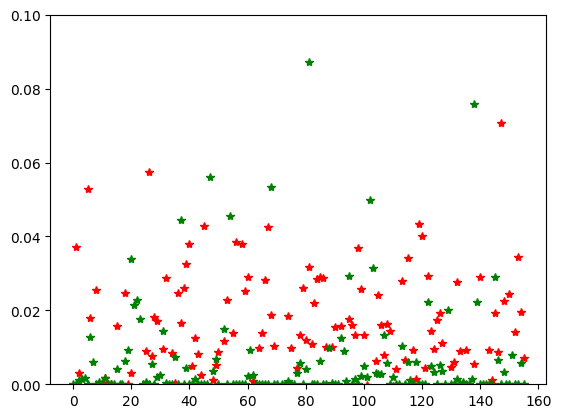

In [44]:
output3 = modelo3.predict(x_test)
print(output3.shape)
plt.figure()
plt.plot(output3, '*r',y_test,'*g')
plt.ylim(0,0.1)

### Entrenamiento modelo 4

In [45]:
from keras.layers import Dropout
input_dim = x_train.shape[1]
num_clases = 1

modelo4 = Sequential()
modelo4.add(Dense(16,activation='tanh',input_dim= input_dim))
modelo4.add(Dropout(0.2))
modelo4.add(Dense(64, activation='tanh'))
modelo4.add(Dropout(0.2))
modelo4.add(Dense(16, activation='tanh'))
modelo4.add(Dropout(0.2))
modelo4.add(Dense(num_clases, activation='linear'))
modelo4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                208       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 64)                1088      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 16)                1040      
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 1)                

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modelo4.compile(loss = 'mse', optimizer = optimizer, metrics=['mae'])

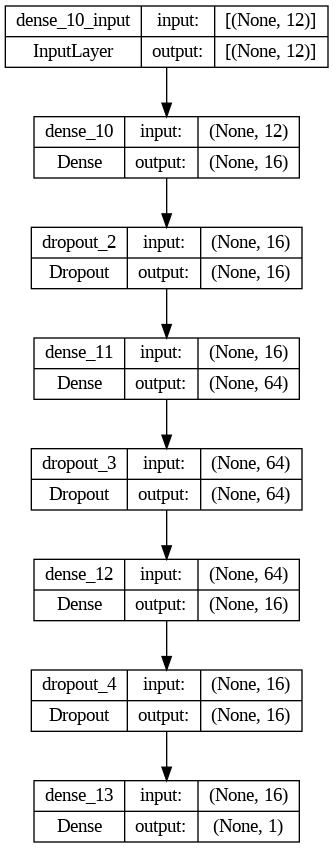

In [47]:
plot_model(modelo4, show_shapes=True)

In [48]:
history4 = modelo4.fit(x_train, y_train, epochs=1000, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/1000
12/12 [==============================] - 1s 20ms/step - loss: 0.1617 - mae: 0.3216 - val_loss: 0.0640 - val_mae: 0.2037
Epoch 2/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.1305 - mae: 0.2873 - val_loss: 0.0433 - val_mae: 0.1557
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.1163 - mae: 0.2698 - val_loss: 0.0340 - val_mae: 0.1327
Epoch 4/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.0981 - mae: 0.2445 - val_loss: 0.0292 - val_mae: 0.1201
Epoch 5/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.1025 - mae: 0.2582 - val_loss: 0.0258 - val_mae: 0.1111
Epoch 6/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.0921 - mae: 0.2381 - val_loss: 0.0244 - val_mae: 0.1080
Epoch 7/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.1023 - mae: 0.2555 - val_loss: 0.0235 - val_mae: 0.1059
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 0

In [49]:
score4 = modelo4.evaluate(x_test, y_test, verbose=0)
print(score4)

[0.006776700261980295, 0.021694689989089966]


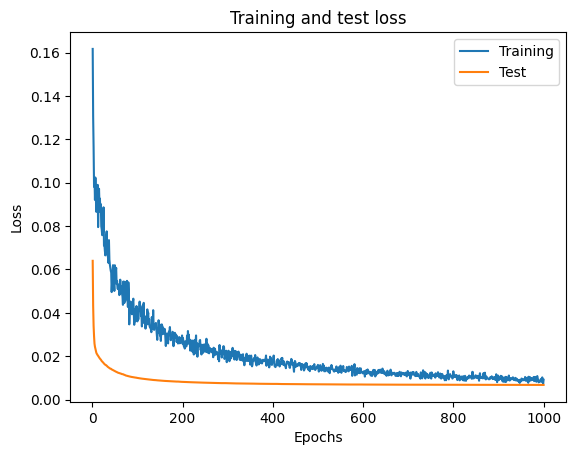

In [50]:
loss_values4 = history4.history['loss']
value_loss4 = history4.history['val_loss']
epoch = range(1,len(loss_values4)+1)
m4 = plt.plot(epoch,loss_values4, label = 'Training')
plt.plot(epoch,value_loss4, label = 'Test')
plt.title("Training and test loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
outputTest4 = modelo4.predict(x_test)
print(outputTest4.shape)

5/5 [==============================] - 0s 4ms/step
(156, 1)


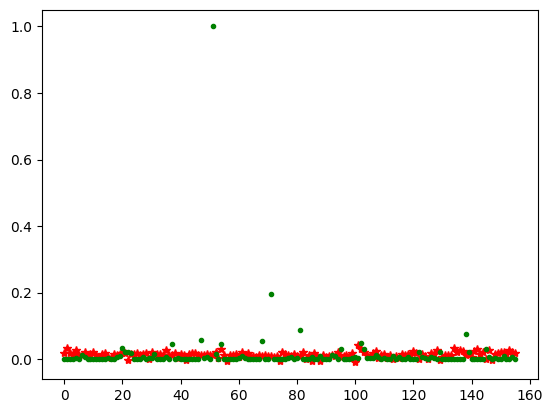

In [52]:
plt.figure()
plt.plot(outputTest4, '*r',y_test, '.g')

5/5 [==============================] - 0s 2ms/step
(156, 1)


(0.0, 0.1)

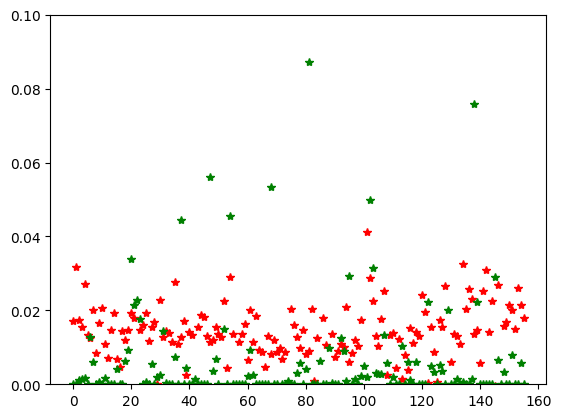

In [53]:
output4 = modelo4.predict(x_test)
print(output4.shape)
plt.figure()
plt.plot(output4, '*r',y_test,'*g')
plt.ylim(0,0.1)

### Uso de libreria Scaler

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
seeds = 42
x_train,x_test,y_train,y_test = train_test_split(caracteristicas, objetivo, test_size=0.3, random_state=seeds)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
print(X_train_scaled)
print(X_test_scaled)

[[ 0.55492368 -1.11559477  0.6811959  ... -1.01258179 -1.21784014
  -0.07097384]
 [ 0.55492368  0.54172915  0.6811959  ...  0.13635096  0.52453381
  -0.07097384]
 [ 0.99231986 -0.28693281  0.24128227 ... -0.10552962  1.03038431
  -0.07097384]
 ...
 [-1.19466103 -1.94425674  0.24128227 ...  0.68058227 -0.4871672
  -0.07097384]
 [-1.19466103  0.54172915 -0.19863136 ...  0.37823154 -1.21784014
  -0.07097384]
 [-1.19466103 -0.28693281  0.24128227 ... -0.28694005  0.01868331
  -0.07097384]]
[[ 0.55492368  0.54172915 -1.07845863 ...  2.97844778  0.52453381
  -0.07097384]
 [ 0.99231986  0.54172915  0.24128227 ...  1.22481358  0.52453381
   2.25825839]
 [ 1.42971604  1.37039111  0.24128227 ... -0.95211165 -1.21784014
  -0.07097384]
 ...
 [ 0.99231986  1.37039111 -0.19863136 ...  2.7365672   2.04208531
   0.51133422]
 [ 1.42971604  1.37039111 -0.19863136 ... -1.07305194 -0.20613914
  -0.07097384]
 [ 1.42971604  1.37039111  0.24128227 ... -1.37540266 -0.71198964
  -0.07097384]]


In [58]:
input_dim = x_train.shape[1]
num_clases = 1

modeloScaler = Sequential()
modeloScaler.add(Dense(64,activation='relu',input_dim= input_dim))
modeloScaler.add(Dense(32, activation='relu'))
modeloScaler.add(Dense(32, activation='relu'))
modeloScaler.add(Dense(16, activation='relu'))
modeloScaler.add(Dense(num_clases, activation='linear'))
modeloScaler.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                832       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 1)                 17        
                                                                 
Total params: 4513 (17.63 KB)
Trainable params: 4513 (17.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


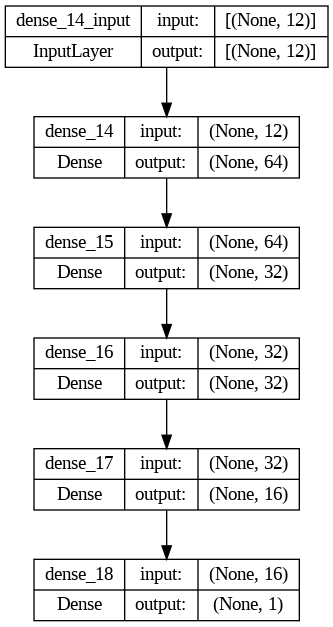

In [59]:
plot_model(modeloScaler, show_shapes=True)

In [60]:
# Compilar el modelo
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
modeloScaler.compile(optimizer=optimizer, loss='mse')

historyScaler = modeloScaler.fit(X_train_scaled, y_train, epochs=2200, batch_size=32, validation_data=(X_test_scaled, y_test), verbose=1)

Epoch 1/2200
12/12 [==============================] - 1s 22ms/step - loss: 0.0396 - val_loss: 0.0430
Epoch 2/2200
12/12 [==============================] - 0s 6ms/step - loss: 0.0351 - val_loss: 0.0390
Epoch 3/2200
12/12 [==============================] - 0s 5ms/step - loss: 0.0314 - val_loss: 0.0358
Epoch 4/2200
12/12 [==============================] - 0s 6ms/step - loss: 0.0283 - val_loss: 0.0328
Epoch 5/2200
12/12 [==============================] - 0s 5ms/step - loss: 0.0256 - val_loss: 0.0301
Epoch 6/2200
12/12 [==============================] - 0s 5ms/step - loss: 0.0228 - val_loss: 0.0284
Epoch 7/2200
12/12 [==============================] - 0s 7ms/step - loss: 0.0213 - val_loss: 0.0270
Epoch 8/2200
12/12 [==============================] - 0s 6ms/step - loss: 0.0200 - val_loss: 0.0258
Epoch 9/2200
12/12 [==============================] - 0s 6ms/step - loss: 0.0189 - val_loss: 0.0247
Epoch 10/2200
12/12 [==============================] - 0s 7ms/step - loss: 0.0179 - val_loss: 0.023

In [61]:
scoreScaler = modeloScaler.evaluate(X_test_scaled, y_test)
print(scoreScaler)

5/5 [==============================] - 0s 3ms/step - loss: 0.0081
0.008083971217274666


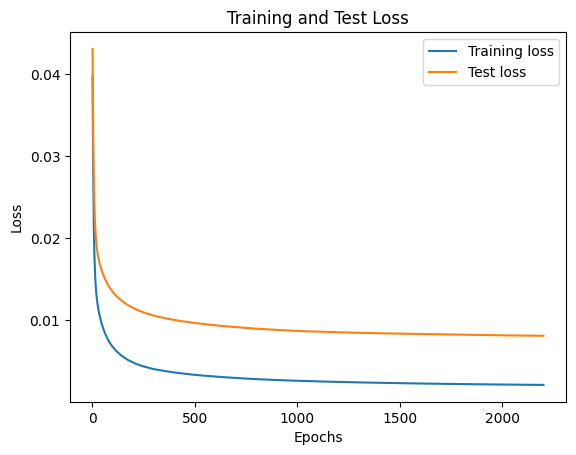

In [62]:
import matplotlib.pyplot as plt

# Obtener la pérdida y la precisión del historial de entrenamiento
train_loss = historyScaler.history['loss']
val_loss = historyScaler.history['val_loss']

# Crear un rango de épocas para el eje x
epochs = range(1, len(train_loss) + 1)

# Graficar la pérdida de entrenamiento y validación
plt.plot(epochs, train_loss, label='Training loss')
plt.plot(epochs, val_loss, label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Comparativa Modelos

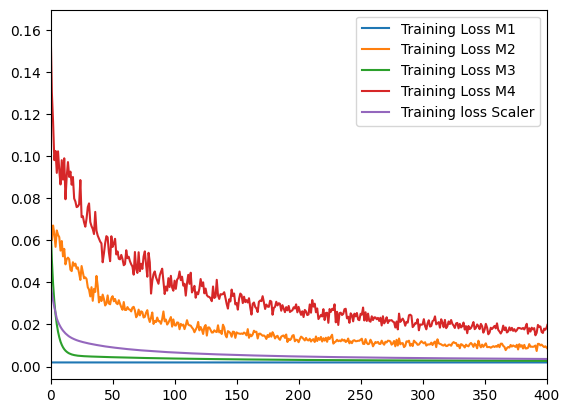

In [89]:
plt.plot(loss, label = 'Training Loss M1')
plt.plot(loss_values2, label = 'Training Loss M2')
plt.plot(loss_values3, label = 'Training Loss M3')
plt.plot(loss_values4, label = 'Training Loss M4')
plt.plot(train_loss, label='Training loss Scaler')
plt.xlim(0,400)
plt.legend()
plt.show()




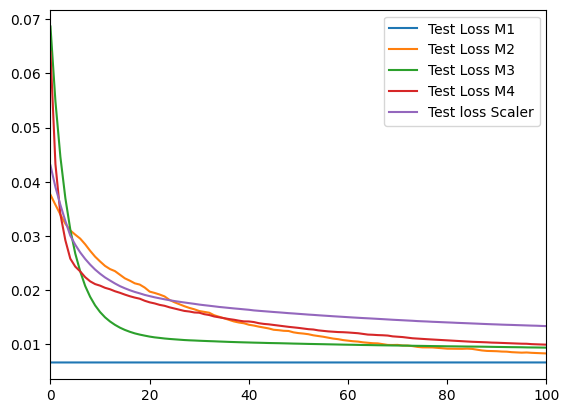

In [90]:
plt.plot(loss_val, label = 'Test Loss M1')
plt.plot(value_loss2, label = 'Test Loss M2')
plt.plot(value_loss3, label = 'Test Loss M3')
plt.plot(value_loss4, label = 'Test Loss M4')
plt.plot(val_loss, label='Test loss Scaler')
plt.xlim(0,100)
plt.legend()
plt.show()

### Pesos neuronas

In [91]:
weightsModel1 = modelo.layers[0].get_weights()
weightsModel1[0]

array([[-0.06698093, -0.3164967 , -0.6098606 ,  0.01986556],
       [-0.3774293 ,  0.4185925 , -0.10741127,  0.5764033 ],
       [ 0.4130292 , -0.4427381 , -0.16392472, -0.508648  ],
       [-0.03974684, -0.32499826, -0.23161303, -0.02553083],
       [-0.01875755, -0.03700016,  0.37447578, -0.30898157],
       [ 0.37849548,  0.52940387, -0.10240167,  0.32853955],
       [-0.17605197,  0.02228281,  0.22060263, -0.28997442],
       [-0.07310383,  0.17244478, -0.5973449 , -0.4211341 ],
       [ 0.38584182,  0.5016796 , -0.13485295,  0.0271909 ],
       [-0.09471883, -0.42386323, -0.18510829,  0.1383604 ],
       [-0.21421671, -0.49547955,  0.14404777, -0.5536935 ],
       [ 0.12362854, -0.11115903, -0.53373325, -0.08115786]],
      dtype=float32)

In [92]:
weightsModel2 = modelo2.layers[0].get_weights()
weightsModel2[0]

array([[ 0.03045018, -0.01504199,  0.23772943, -0.00860676, -0.15411682,
        -0.05431703, -0.06193992, -0.15534857,  0.19868387,  0.29159486,
         0.10790689,  0.19608852,  0.34445   ,  0.00733935,  0.26112485,
         0.14315593, -0.18310332,  0.11810439,  0.26605797, -0.0035786 ,
         0.3385983 ,  0.06233407, -0.17608745,  0.26641724, -0.24914744,
        -0.21093445,  0.07264423,  0.07574401, -0.07658861,  0.02690828,
         0.09478461,  0.00299934],
       [-0.21034707, -0.14053105, -0.02385782,  0.29900503,  0.05133291,
         0.10471591, -0.33068648, -0.16163404,  0.2837282 ,  0.22682284,
        -0.30498514,  0.18975097, -0.18970297,  0.15430972,  0.02716991,
        -0.09729959,  0.09891118,  0.24043149, -0.2161713 , -0.30612695,
         0.3228446 , -0.1774623 , -0.10714815,  0.34487593, -0.1570109 ,
         0.1394566 , -0.17603979,  0.01773465, -0.3305872 ,  0.2958945 ,
         0.07304953, -0.05138223],
       [-0.15795645, -0.04078655, -0.3392628 ,  0.0208

In [93]:
weightsModel3 = modelo3.layers[0].get_weights()
weightsModel3[0]

array([[ 0.05422326, -0.18204314,  0.03014409, -0.2968421 , -0.12024041,
        -0.0082321 , -0.21593001,  0.02764406, -0.2519249 , -0.06464636,
        -0.02852467,  0.06830484,  0.28987828,  0.18510818, -0.26809344,
        -0.04136014, -0.0617657 ,  0.09171007,  0.3359448 , -0.33257902,
        -0.08359483, -0.00984927, -0.19442037, -0.36210722, -0.146614  ,
        -0.30867168,  0.10993094,  0.2807457 , -0.08316753,  0.19823892,
         0.13536084, -0.05542964],
       [ 0.24135944, -0.2622082 ,  0.27860713, -0.31103593,  0.2850773 ,
         0.20218545,  0.05945467,  0.17914216, -0.2176499 ,  0.28293893,
        -0.18612482, -0.30322456, -0.08415286,  0.25561216, -0.18716994,
         0.21753182, -0.05772114, -0.01930179, -0.3410656 , -0.02728426,
        -0.3390515 , -0.13154133, -0.3041047 ,  0.0908013 ,  0.1551367 ,
        -0.28001955, -0.10662783,  0.04007553,  0.3349686 , -0.13918222,
        -0.17909078, -0.16671634],
       [ 0.2702356 , -0.28630155,  0.08615445, -0.0134

In [94]:
weightsModel4 = modelo4.layers[0].get_weights()
weightsModel4[0]

array([[-0.44315073, -0.1982838 , -0.12261367, -0.18735375, -0.39351705,
         0.05029499,  0.21800402,  0.40569472,  0.27209243, -0.26338527,
         0.37509444, -0.21934687,  0.4354181 , -0.11453531, -0.3955225 ,
         0.42362314],
       [ 0.46062607, -0.0924447 , -0.43451747,  0.26198947,  0.43737897,
         0.05925567,  0.04775936,  0.14266616, -0.36325595, -0.18337488,
        -0.4266597 , -0.37848976, -0.1267677 ,  0.18060191,  0.21346281,
         0.09177416],
       [ 0.3489945 , -0.41377676, -0.04656845, -0.23544122,  0.3289238 ,
        -0.19897653,  0.31429577,  0.21283679, -0.3045171 ,  0.3167251 ,
        -0.06862346, -0.15229236, -0.00948743,  0.16247472, -0.4020665 ,
         0.16706897],
       [ 0.05221944,  0.32120758,  0.0815523 ,  0.06823572,  0.23215644,
        -0.18682364,  0.1886636 , -0.31326094,  0.0784795 ,  0.06537783,
         0.21032308,  0.14934321,  0.36072567, -0.21781929,  0.22297952,
        -0.29331985],
       [-0.28507766,  0.14742926,  0

In [95]:
weightsModelScaler = modeloScaler.layers[0].get_weights()
weightsModelScaler[0]

array([[-2.06652507e-01, -2.14424223e-01, -1.30285591e-01,
         1.64485052e-02, -7.72063732e-02,  2.38407582e-01,
        -1.09427534e-01,  1.07594952e-01,  9.60059911e-02,
         4.15701233e-02,  8.95867795e-02,  5.52383550e-02,
         1.16189130e-01,  7.22999824e-03, -1.32311910e-01,
         1.66199908e-01, -2.58110851e-01,  1.16353363e-01,
        -1.80881754e-01, -2.26639435e-01, -1.54355317e-01,
        -2.29764104e-01, -2.23217994e-01, -3.50265168e-02,
        -1.48945689e-01, -1.70131981e-01,  2.34100848e-01,
         2.02541217e-01, -2.10864186e-01,  1.80436954e-01,
         4.74610776e-02,  2.32836053e-01, -2.45821744e-01,
         1.54018521e-01, -7.52388909e-02, -2.33307987e-01,
         1.47075161e-01,  1.36110678e-01, -3.35936844e-02,
        -1.71307072e-01, -9.58025232e-02, -2.77645081e-01,
        -6.80817068e-02, -1.12707488e-01,  2.09073901e-01,
        -1.69455335e-02,  1.24570303e-01,  2.66372263e-01,
        -2.12034181e-01,  6.03072084e-02,  1.91216543e-0

### Bias

In [96]:
weightsModel1 = modelo.layers[0].get_weights()
weightsModel1[1]

array([-1.2602677e-03, -6.9505046e-04, -3.8212750e-03, -5.4468514e-05],
      dtype=float32)

In [97]:
weightsModel2 = modelo2.layers[0].get_weights()
weightsModel2[1]

array([-0.00045522, -0.01407261,  0.0055443 , -0.00825217, -0.0005738 ,
       -0.00388846,  0.00466798, -0.00147936, -0.00238695,  0.00118731,
       -0.00119429,  0.00689653, -0.00416793,  0.00856407, -0.00874808,
        0.00649686,  0.01363879, -0.01005779,  0.0011596 , -0.01086091,
       -0.00899641,  0.01611308, -0.00940969, -0.01105093,  0.01360153,
       -0.00514655,  0.00138172, -0.0076019 , -0.00780803,  0.01201476,
       -0.00624558,  0.00444211], dtype=float32)

In [98]:
weightsModel3 = modelo3.layers[0].get_weights()
weightsModel3[1]

array([-0.00400906, -0.00552305, -0.01622352,  0.01296813, -0.01320159,
       -0.01273133,  0.0048734 ,  0.00148352, -0.00237961,  0.01143653,
       -0.00133014, -0.01954407, -0.00108125, -0.00256569, -0.00536345,
       -0.00119732,  0.        , -0.00085783,  0.        , -0.0029293 ,
       -0.00425051, -0.00566166, -0.00093418,  0.00142456,  0.00048017,
       -0.00058672, -0.00739423,  0.01110789,  0.01751038, -0.00027278,
       -0.00138761,  0.00126352], dtype=float32)

In [99]:
weightsModel4 = modelo4.layers[0].get_weights()
weightsModel4[1]

array([ 0.02250821, -0.02246107, -0.01680058, -0.04666405, -0.03986989,
        0.06227585, -0.03907161, -0.03038181, -0.03988698, -0.02099008,
        0.01444557,  0.03536233, -0.04498973,  0.05849609,  0.01125879,
       -0.02364662], dtype=float32)

In [100]:
weightsModelScaler = modeloScaler.layers[0].get_weights()
weightsModelScaler[1]

array([ 0.00173843, -0.00210163,  0.00078873, -0.00139686,  0.00838897,
       -0.00589442,  0.00151239,  0.00130133,  0.00527752, -0.00810034,
        0.00018027, -0.00508964, -0.00730472, -0.00201227, -0.0003155 ,
       -0.00375178, -0.00925053, -0.00236048, -0.00031895, -0.00206222,
       -0.00065201,  0.0024702 , -0.00103095, -0.00728265, -0.00427536,
       -0.00099008,  0.00355479, -0.00147459, -0.00433656,  0.00141807,
        0.00508837, -0.00052417, -0.00240711,  0.00557589,  0.00223644,
       -0.00566559, -0.00282814, -0.00148312, -0.00236363,  0.00315531,
       -0.00318683,  0.00062446, -0.00413037,  0.00401468, -0.00420225,
       -0.00199174, -0.00976524,  0.00025335, -0.00550174,  0.00154726,
       -0.00132696,  0.00127053, -0.00414066, -0.00011752, -0.00032983,
        0.0052261 ,  0.00682201, -0.00592309,  0.00075302, -0.0056547 ,
        0.00178486, -0.00616286, -0.00269526, -0.00119451], dtype=float32)